In [29]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
# Attention Layer
class Attention(tf.keras.layers.Layer):
    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(Attention, self).__init__()
        
    def build(self, input_shape):
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                               initializer="zeros")        
        super(Attention, self).build(input_shape)
        
    def call(self, x):
        e = tf.keras.backend.tanh(tf.keras.backend.dot(x, self.W) + self.b)
        a = tf.keras.backend.softmax(e, axis=1)
        output = x * a
        if self.return_sequences:
            return output
        return tf.keras.backend.sum(output, axis=1)

In [31]:
data = pd.read_csv('E:/BTC-USD.csv')
df = data
X = []
Y = []
window_size=100
for i in range(1, len(df) - window_size - 1, 1):
    first = df.iloc[i, 4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 4] - first) / first)
    temp2.append((df.iloc[i + window_size, 4] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42,shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)

train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

In [33]:
model = tf.keras.Sequential()

# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=5, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=5, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=5, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))

In [34]:
# LSTM layers with Attention
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Attention(return_sequences=True))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.3))

In [35]:
# Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X, test_Y), epochs=100, batch_size=32, verbose=1, shuffle=True)
history_dict = history.history
train_loss = history_dict['loss']
train_msle = history_dict['mse']

model.evaluate(test_X, test_Y)

Epoch 1/100
25/25 [==============================] - 37s 126ms/step - loss: 0.1481 - mse: 0.1481 - mae: 0.2571 - val_loss: 0.0515 - val_mse: 0.0515 - val_mae: 0.1778
Epoch 2/100
25/25 [==============================] - 1s 27ms/step - loss: 0.0490 - mse: 0.0490 - mae: 0.1570 - val_loss: 0.0448 - val_mse: 0.0448 - val_mae: 0.1485
Epoch 3/100
25/25 [==============================] - 1s 29ms/step - loss: 0.0387 - mse: 0.0387 - mae: 0.1302 - val_loss: 0.0221 - val_mse: 0.0221 - val_mae: 0.1088
Epoch 4/100
25/25 [==============================] - 1s 38ms/step - loss: 0.0307 - mse: 0.0307 - mae: 0.1128 - val_loss: 0.0243 - val_mse: 0.0243 - val_mae: 0.1106
Epoch 5/100
25/25 [==============================] - 1s 31ms/step - loss: 0.0184 - mse: 0.0184 - mae: 0.0912 - val_loss: 0.0124 - val_mse: 0.0124 - val_mae: 0.0747
Epoch 6/100
25/25 [==============================] - 1s 27ms/step - loss: 0.0190 - mse: 0.0190 - mae: 0.0873 - val_loss: 0.0116 - val_mse: 0.0116 - val_mae: 0.0823
Epoch 7/100
25

Epoch 51/100
25/25 [==============================] - 1s 24ms/step - loss: 0.0062 - mse: 0.0062 - mae: 0.0490 - val_loss: 0.0053 - val_mse: 0.0053 - val_mae: 0.0517
Epoch 52/100
25/25 [==============================] - 1s 25ms/step - loss: 0.0049 - mse: 0.0049 - mae: 0.0484 - val_loss: 0.0045 - val_mse: 0.0045 - val_mae: 0.0518
Epoch 53/100
25/25 [==============================] - 1s 25ms/step - loss: 0.0048 - mse: 0.0048 - mae: 0.0444 - val_loss: 0.0055 - val_mse: 0.0055 - val_mae: 0.0531
Epoch 54/100
25/25 [==============================] - 1s 31ms/step - loss: 0.0052 - mse: 0.0052 - mae: 0.0457 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0460
Epoch 55/100
25/25 [==============================] - 1s 25ms/step - loss: 0.0049 - mse: 0.0049 - mae: 0.0490 - val_loss: 0.0048 - val_mse: 0.0048 - val_mae: 0.0496
Epoch 56/100
25/25 [==============================] - 1s 25ms/step - loss: 0.0049 - mse: 0.0049 - mae: 0.0448 - val_loss: 0.0066 - val_mse: 0.0066 - val_mae: 0.0560
Epoch 57/1

7/7 [==============================] - 0s 7ms/step - loss: 0.0055 - mse: 0.0055 - mae: 0.0534


[0.0055138953030109406, 0.0055138953030109406, 0.05337519198656082]

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

# Calculate MAE, RMSE, and R^2
mae = mean_absolute_error(test_Y.reshape(-1, 1), yhat_probs)
print('Mean Absolute Error (MAE): %f' % mae)

rmse = np.sqrt(mean_squared_error(test_Y.reshape(-1, 1), yhat_probs))
print('Root Mean Squared Error (RMSE): %f' % rmse)

r2 = r2_score(test_Y.reshape(-1, 1), yhat_probs)
print('R2 Score: %f' % r2)

Mean Absolute Error (MAE): 0.053375
Root Mean Squared Error (RMSE): 0.074256
R2 Score: 0.989915


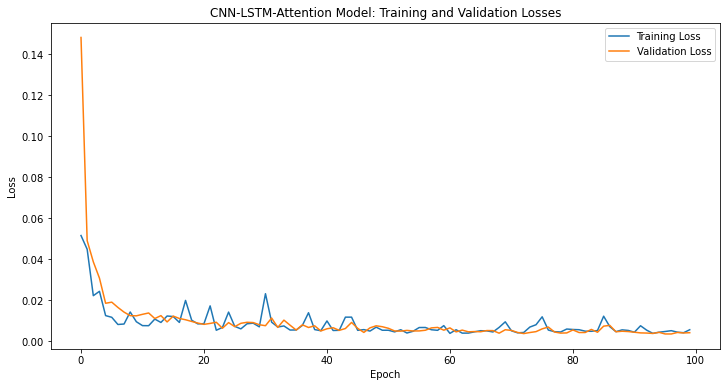

In [37]:
# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['val_loss'], label='Training Loss')
plt.plot(history.history['loss'], label='Validation Loss')
plt.title('CNN-LSTM-Attention Model: Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [38]:
# Predict the values using the trained model
predictions = model.predict(test_X)

# Reverse the normalization process
def denormalize(value, first_value):
    return value * first_value + first_value

denormalized_predictions = np.empty_like(predictions)
denormalized_test_Y = np.empty_like(test_Y)

# Apply denormalization
for i in range(len(predictions)):
    first_value = df.iloc[i + window_size, 1]
    denormalized_predictions[i] = denormalize(predictions[i], first_value)
    denormalized_test_Y[i] = denormalize(test_Y[i], first_value)
    
# Compare denormalized predictions with actual values
for i in range(len(denormalized_predictions)):
    print(f"Prediction: {denormalized_predictions[i][0].item():.2f} | Actual: {denormalized_test_Y[i][0].item():.2f}")

7/7 [==============================] - 0s 7ms/step
Prediction: 6383.48 | Actual: 6613.27
Prediction: 8561.41 | Actual: 9033.39
Prediction: 12587.33 | Actual: 13135.16
Prediction: 3907.09 | Actual: 4025.56
Prediction: 6270.09 | Actual: 6247.53
Prediction: 5159.85 | Actual: 5628.80
Prediction: 4997.73 | Actual: 4461.00
Prediction: 6488.97 | Actual: 6531.16
Prediction: 8001.56 | Actual: 8053.58
Prediction: 7014.40 | Actual: 7510.40
Prediction: 5043.75 | Actual: 5102.34
Prediction: 4202.46 | Actual: 4403.05
Prediction: 5021.24 | Actual: 5060.37
Prediction: 11355.77 | Actual: 11494.41
Prediction: 12558.00 | Actual: 13003.65
Prediction: 10697.89 | Actual: 11637.80
Prediction: 5260.04 | Actual: 5137.61
Prediction: 9063.00 | Actual: 9025.71
Prediction: 8243.94 | Actual: 8757.21
Prediction: 20829.08 | Actual: 22141.90
Prediction: 6129.19 | Actual: 6073.39
Prediction: 23416.35 | Actual: 22573.27
Prediction: 7876.01 | Actual: 7045.58
Prediction: 17063.92 | Actual: 16866.17
Prediction: 22272.04 | 

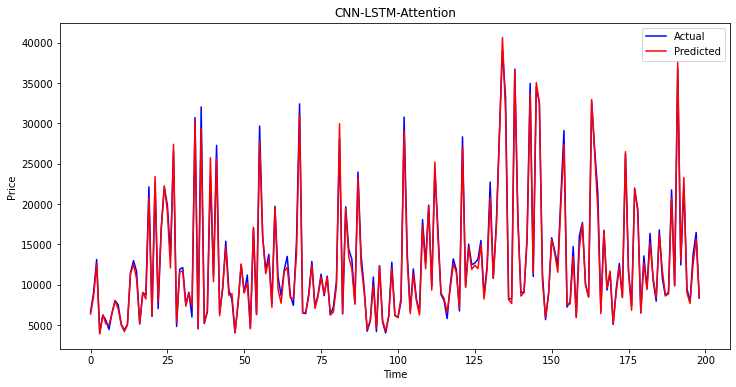

<Figure size 432x288 with 0 Axes>

In [39]:
# Flatten the denormalized_test_Y and denormalized_predictions arrays
denormalized_test_Y_flattened = denormalized_test_Y.flatten()
denormalized_predictions_flattened = denormalized_predictions.flatten()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(denormalized_test_Y_flattened, label='Actual', color='blue')
plt.plot(denormalized_predictions_flattened, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.title('CNN-LSTM-Attention')
plt.show()
# Save the plot as an image file
plt.savefig('actual_vs_predicted.png', dpi=300, bbox_inches='tight')